# CP 322 - Final Project

Aditya Chauhan (169027493)

## Introduction

### Dataset Choice

- [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)

### Key Research Questions:

- Can external factors such as familial support, alcohol consumption, absences, and many others, predict student's academic success?
- If they can, which model can most accurately use the factors to make the prediction?

### Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from category_encoders import BinaryEncoder

student_mat = pd.read_csv("Data/student-mat.csv", sep=";")
student_por = pd.read_csv("Data/student-por.csv", sep=";")

## Data Exploration

### Objective & Use Case

Student success is a cornerstone of educational systems, and identifying the drivers of academic performance is critical for improving outcomes. This project utilizes the Student Performance Dataset to develop a predictive model that analyzes the factors affecting final grades (G3). By addressing key questions—like the importance of early grades (G1, G2), the role of family support, and the impact of behavioral factors—this model provides practical tools for educators and administrators to allocate resources effectively and support at-risk students.

### Dataset Overview

In [33]:
# Number of students in each dataset
print(f"Number of students in student-mat dataset: {len(student_mat)}")
print(f"Number of students in student-por dataset: {len(student_por)}")

# Missing value check
missing_values_mat = student_mat.isnull().sum()
missing_values_por = student_por.isnull().sum()

# Summary statistics for numerical columns
summary_stats_mat = student_mat.describe()
summary_stats_por = student_por.describe()

# Unique value counts for categorical columns
categorical_columns_mat = student_mat.select_dtypes(include=['object']).columns
unique_counts_mat = {col: student_mat[col].nunique() for col in categorical_columns_mat}
categorical_columns_por = student_por.select_dtypes(include=['object']).columns
unique_counts_por = {col: student_por[col].nunique() for col in categorical_columns_por}

print("\nMissing Values in mat:\n", missing_values_mat)
print("\nSummary Statistics of mat:\n", summary_stats_mat)
print("\nUnique Value Counts in mat:\n", unique_counts_mat)
print("\nMissing Values in por:\n", missing_values_por)
print("\nSummary Statistics of por:\n", summary_stats_por)
print("\nUnique Value Counts in por:\n", unique_counts_por)

Number of students in student-mat dataset: 395
Number of students in student-por dataset: 649

Missing Values in mat:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Summary Statistics of mat:
               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240   

In summary, the dataset has 0 missing values and a mix of continuous & categorical features

### Feature Analysis

- Tabular Summary
- Analysis of Continuous & Categorical Features
- Visualizations

Analyzing Covariance and Correlation for student-mat Dataset
Covariance Matrix for student-mat:
                  age      Medu      Fedu  traveltime  studytime  failures  \
age         1.628285 -0.228619 -0.226949    0.062873  -0.004434  0.231221   
Medu       -0.228619  1.198445  0.742717   -0.131061   0.059667 -0.192681   
Fedu       -0.226949  0.742717  1.184180   -0.120073  -0.008379 -0.202641   
traveltime  0.062873 -0.131061 -0.120073    0.486513  -0.059070  0.047844   
studytime  -0.004434  0.059667 -0.008379   -0.059070   0.704324 -0.108321   
failures    0.231221 -0.192681 -0.202641    0.047844  -0.108321  0.553017   
famrel      0.061717 -0.003842 -0.001337   -0.010512   0.029898 -0.029564   
freetime    0.020947  0.033779 -0.013963   -0.011861  -0.120041  0.068329   
goout       0.180364  0.078115  0.052220    0.022162  -0.059706  0.103123   
Dalc        0.149039  0.019341  0.002313    0.085941  -0.146533  0.090118   
Walc        0.192733 -0.066440 -0.017702    0.120478  -0

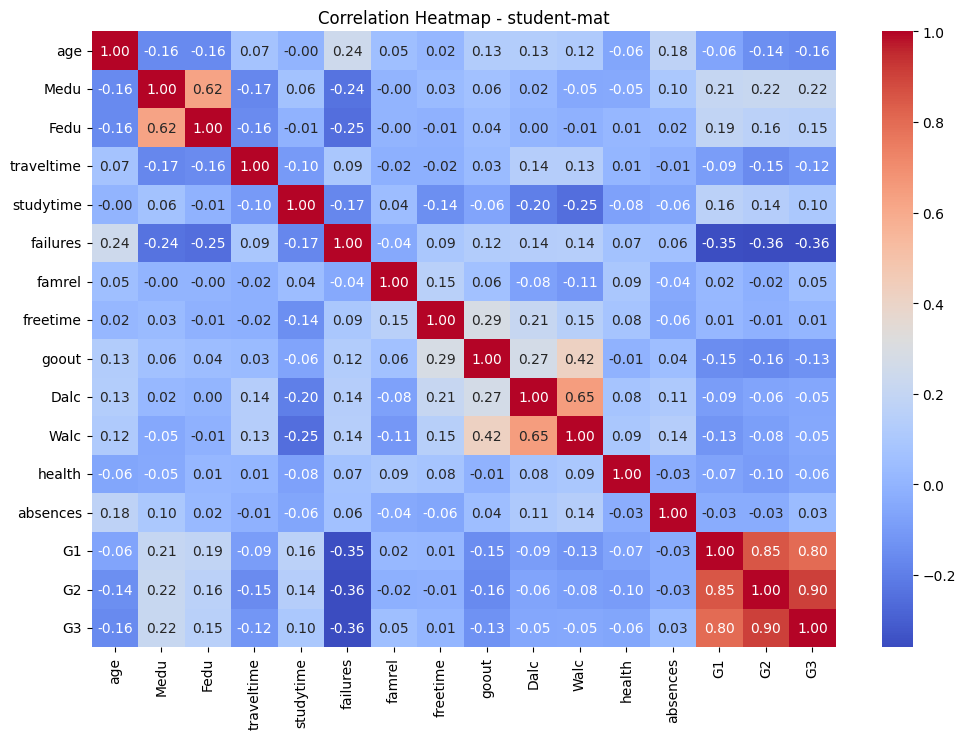

Analyzing Covariance and Correlation for student-por Dataset
Covariance Matrix for student-por:
                  age      Medu      Fedu  traveltime  studytime  failures  \
age         1.483859 -0.149028 -0.162192    0.031454  -0.008503  0.231222   
Medu       -0.149028  1.287208  0.808005   -0.225156   0.091294 -0.115907   
Fedu       -0.162192  0.808005  1.209848   -0.171520   0.045985 -0.108262   
traveltime  0.031454 -0.225156 -0.171520    0.560492  -0.039220  0.043405   
studytime  -0.008503  0.091294  0.045985   -0.039220   0.688086 -0.072555   
failures    0.231222 -0.115907 -0.108262    0.043405  -0.072555  0.351928   
famrel     -0.023935  0.026479  0.021293   -0.006812  -0.003272 -0.035518   
freetime   -0.006287 -0.023476  0.007909    0.000737  -0.060012  0.067963   
goout       0.161564  0.012721  0.035810    0.050574  -0.073579  0.031442   
Dalc        0.151827 -0.007364  0.000062    0.064270  -0.105549  0.058128   
Walc        0.135111 -0.028803  0.054312    0.054816  -0

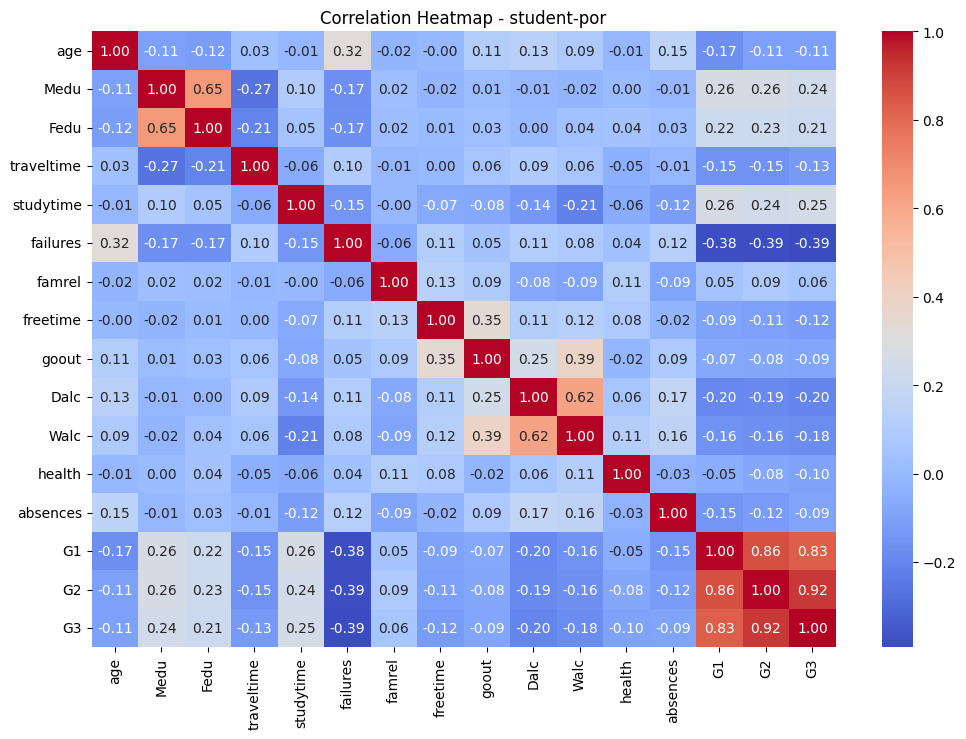

Advanced Overview for student-mat Dataset:

Numerical Summary:


,count,mean,std,min,25%,50%,75%,max,missing_values,unique_values
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0,0,8
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0,0,5
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0,0,5
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0,0,4
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0,0,4
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0,0,4
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0,0,5
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0,0,5
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0,0,5
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0,0,5



Categorical Summary:


,unique_values,missing_values,most_frequent_value
school,2,0,GP
sex,2,0,F
address,2,0,U
famsize,2,0,GT3
Pstatus,2,0,T
Mjob,5,0,other
Fjob,5,0,other
reason,4,0,course
guardian,3,0,mother
schoolsup,2,0,no


Advanced Overview for student-por Dataset:

Numerical Summary:


,count,mean,std,min,25%,50%,75%,max,missing_values,unique_values
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0,0,8
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0,0,5
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0,0,5
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0,0,4
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0,0,4
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0,0,4
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0,0,5
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0,0,5
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0,0,5
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0,0,5



Categorical Summary:


,unique_values,missing_values,most_frequent_value
school,2,0,GP
sex,2,0,F
address,2,0,U
famsize,2,0,GT3
Pstatus,2,0,T
Mjob,5,0,other
Fjob,5,0,other
reason,4,0,course
guardian,3,0,mother
schoolsup,2,0,no


Exploring G3 (Final Grade) in student-mat Dataset:


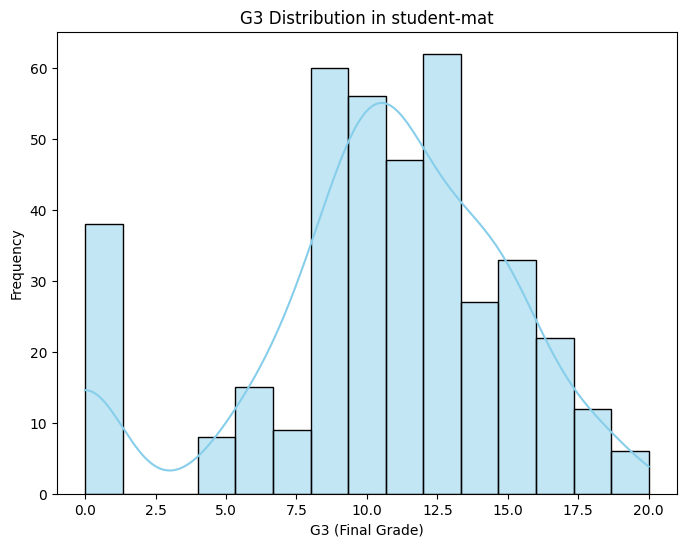

Exploring G3 (Final Grade) in student-por Dataset:


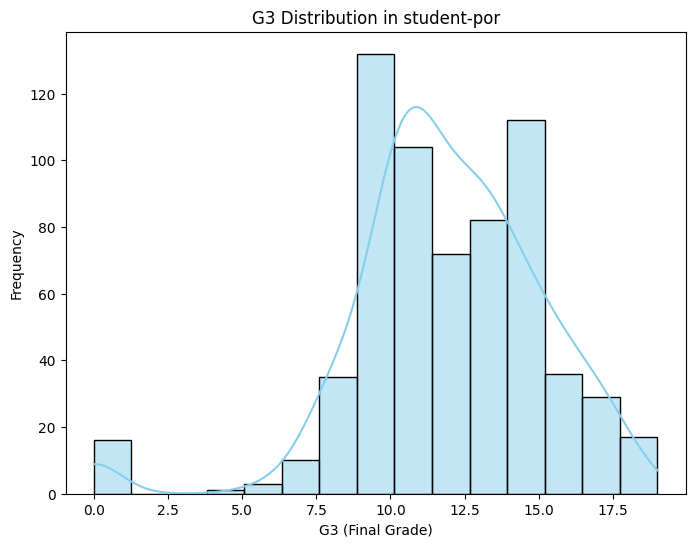

Feature Importance Exploration for student-mat Dataset:

Feature Importance:


,Feature,Importance
31,G2,0.738437
29,absences,0.154388
2,age,0.033211
10,reason,0.031903
13,studytime,0.010554
30,G1,0.007035
27,Walc,0.003385
24,freetime,0.002654
25,goout,0.002645
12,traveltime,0.001844


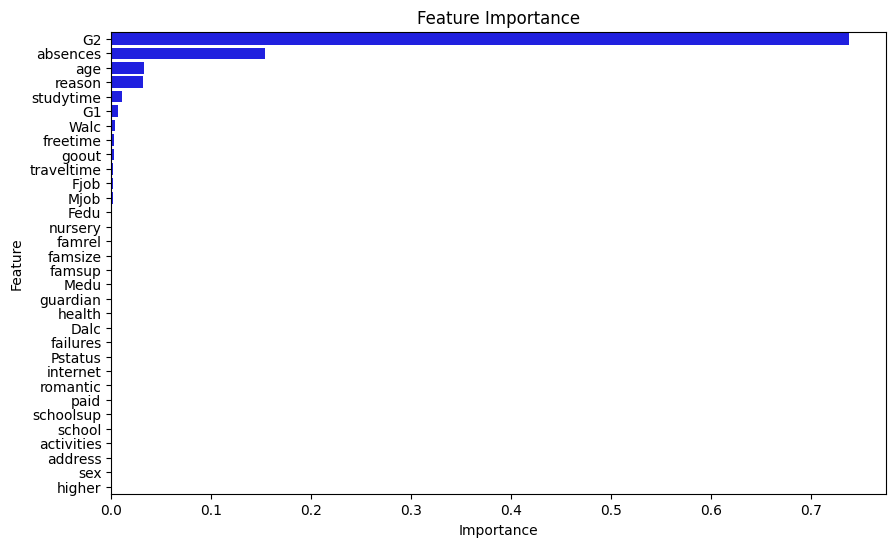

Feature Importance Exploration for student-por Dataset:

Feature Importance:


,Feature,Importance
31,G2,0.835501
29,absences,0.025762
25,goout,0.022148
1,sex,0.017793
0,school,0.016569
7,Fedu,0.015101
30,G1,0.010573
24,freetime,0.006153
19,nursery,0.005590
23,famrel,0.005279


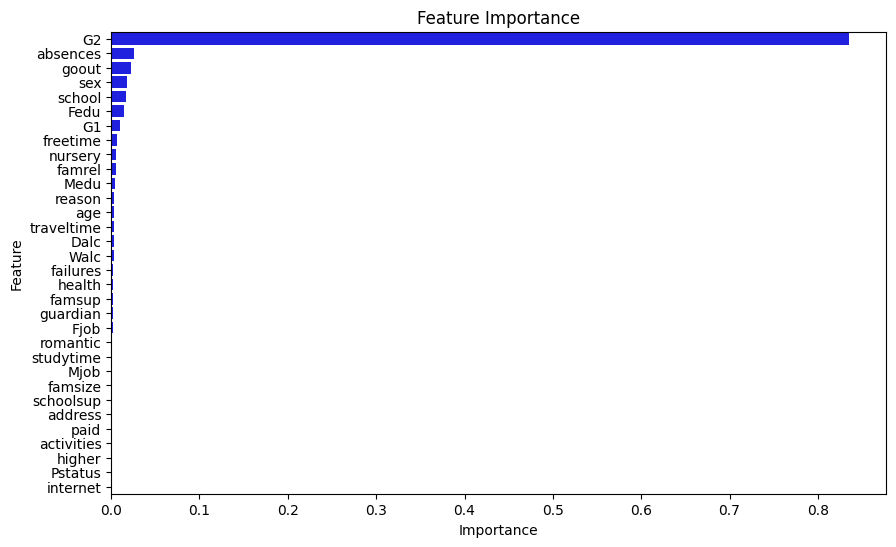

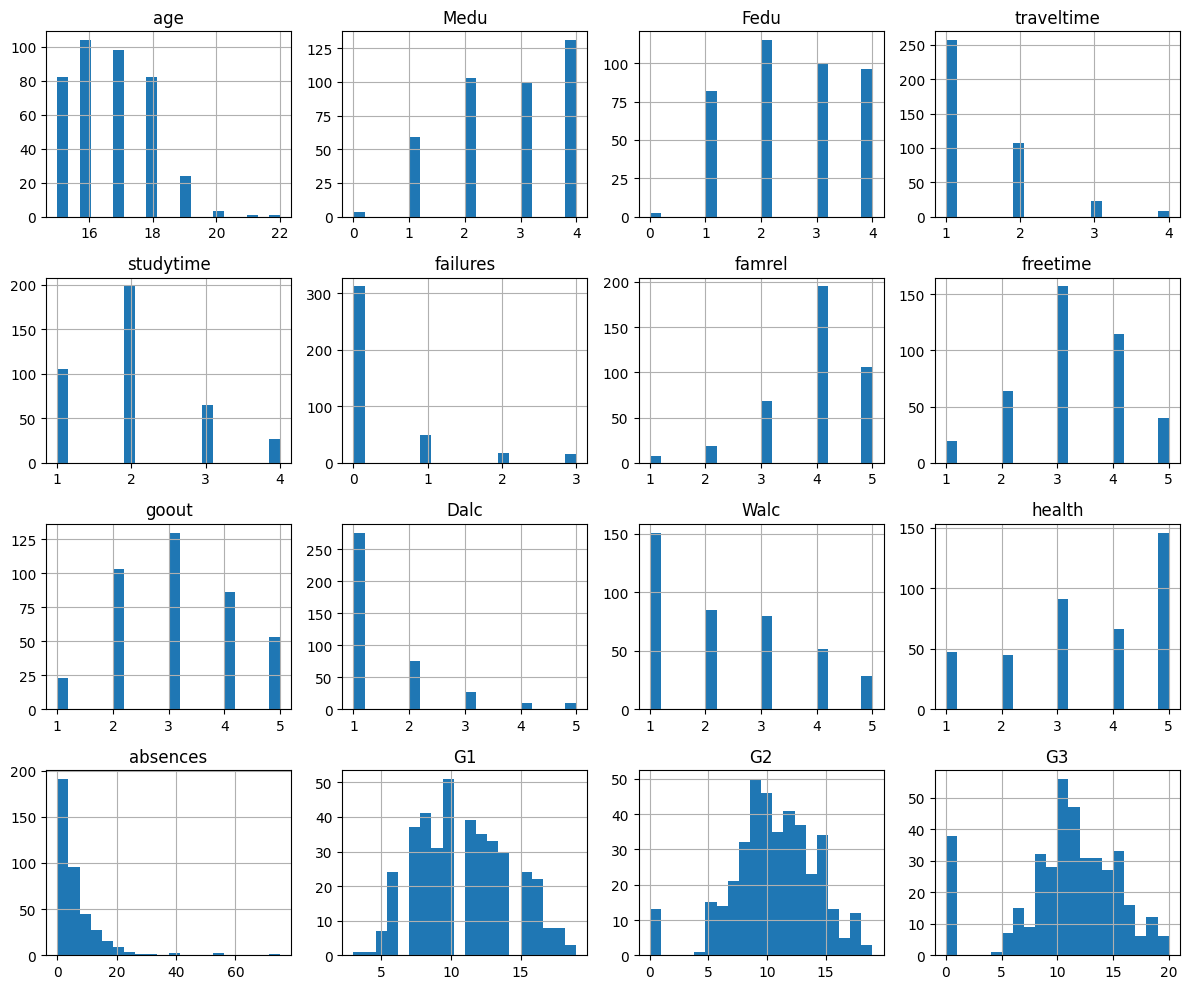

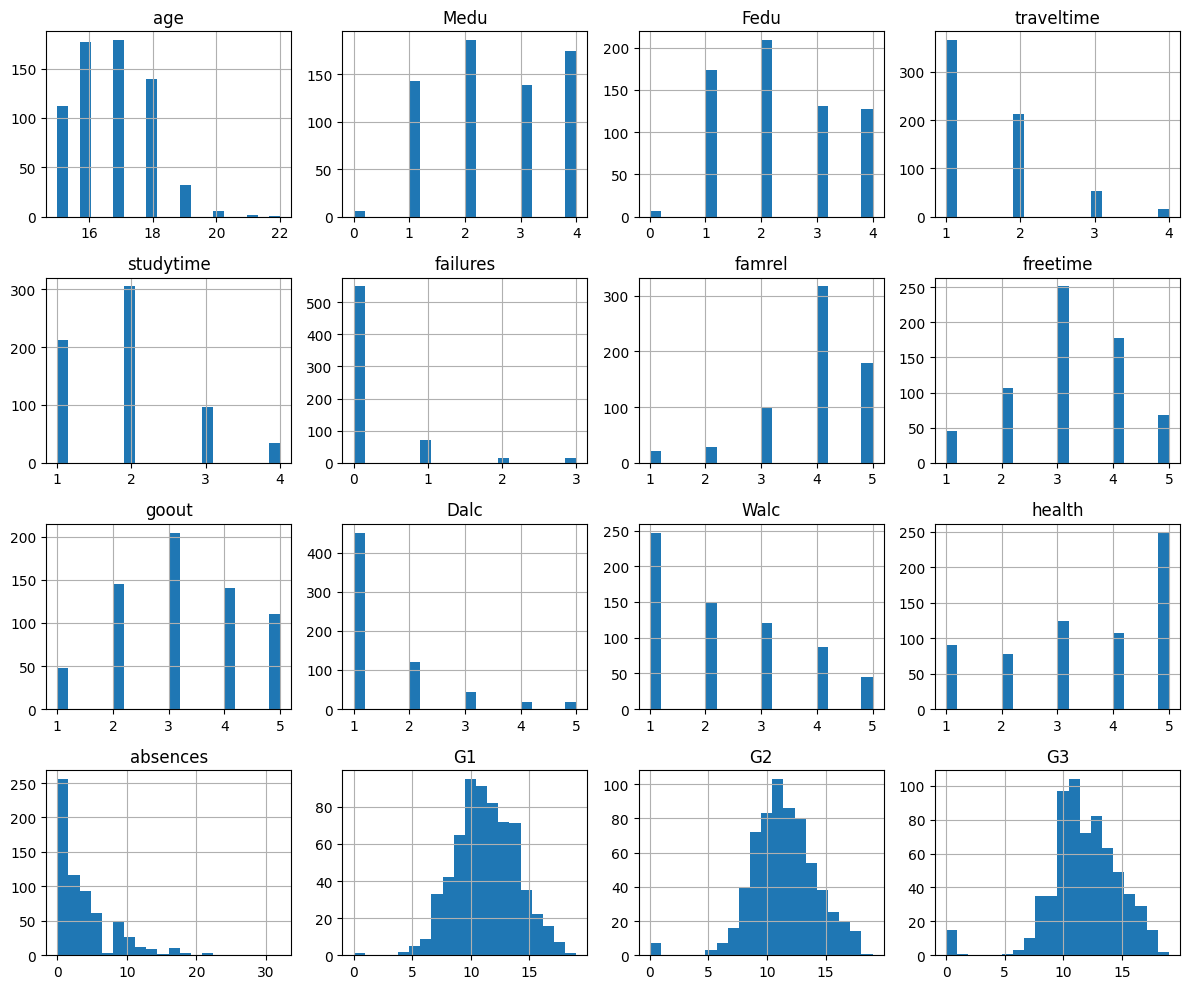

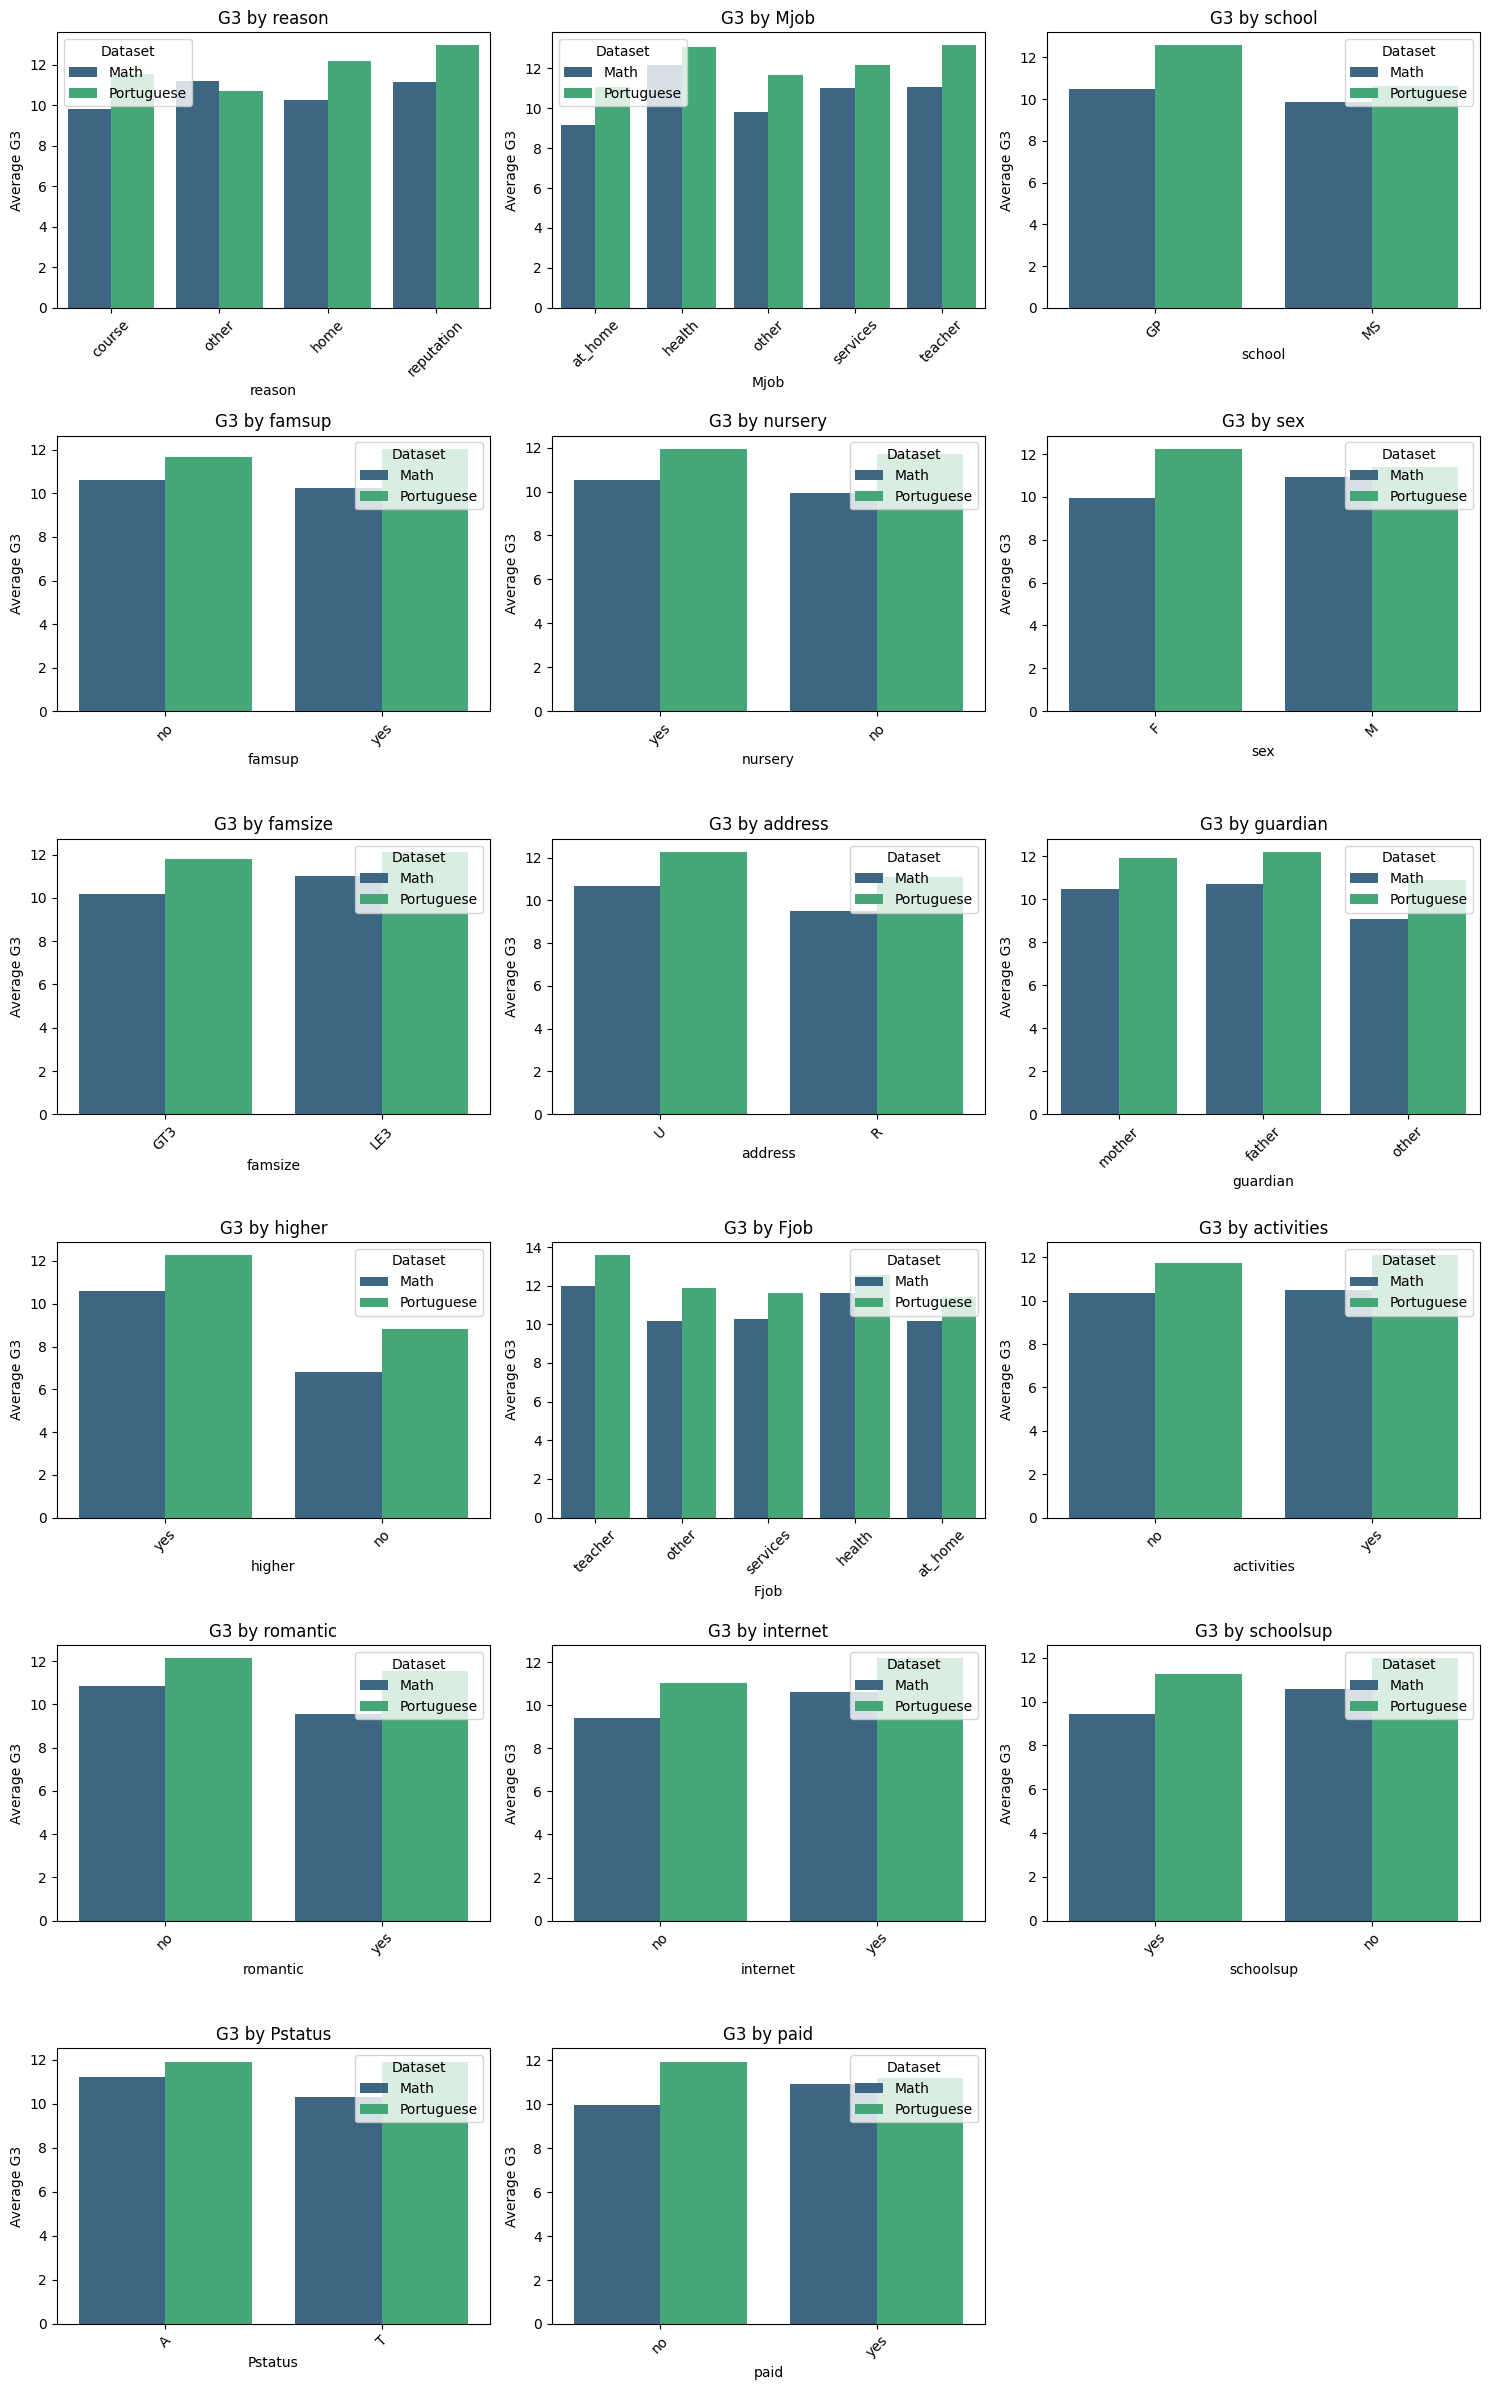


Analyzing Cardinality for student-mat Dataset
Feature: absences, Unique Values: 34
Feature: G3, Unique Values: 18
Feature: G1, Unique Values: 17
Feature: G2, Unique Values: 17
Feature: age, Unique Values: 8
Feature: Medu, Unique Values: 5
Feature: Fedu, Unique Values: 5
Feature: Mjob, Unique Values: 5
Feature: Fjob, Unique Values: 5
Feature: famrel, Unique Values: 5
Feature: freetime, Unique Values: 5
Feature: goout, Unique Values: 5
Feature: Dalc, Unique Values: 5
Feature: Walc, Unique Values: 5
Feature: health, Unique Values: 5
Feature: reason, Unique Values: 4
Feature: traveltime, Unique Values: 4
Feature: studytime, Unique Values: 4
Feature: failures, Unique Values: 4
Feature: guardian, Unique Values: 3
Feature: school, Unique Values: 2
Feature: sex, Unique Values: 2
Feature: address, Unique Values: 2
Feature: famsize, Unique Values: 2
Feature: Pstatus, Unique Values: 2
Feature: schoolsup, Unique Values: 2
Feature: famsup, Unique Values: 2
Feature: paid, Unique Values: 2
Feature: 

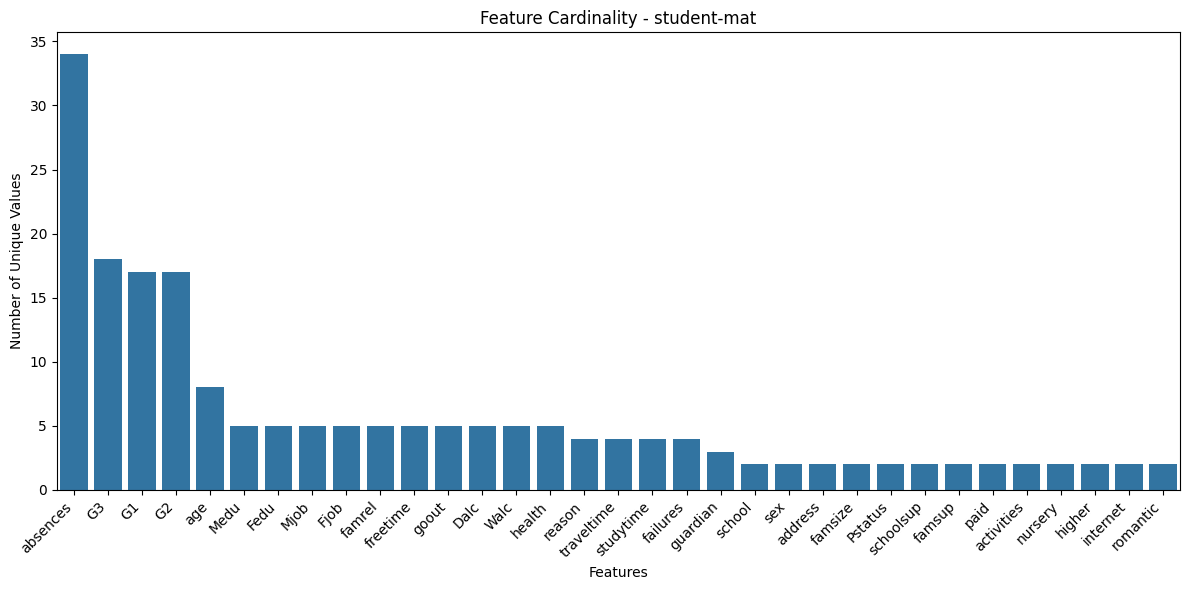


Analyzing Cardinality for student-por Dataset
Feature: absences, Unique Values: 24
Feature: G1, Unique Values: 17
Feature: G3, Unique Values: 17
Feature: G2, Unique Values: 16
Feature: age, Unique Values: 8
Feature: Medu, Unique Values: 5
Feature: Fedu, Unique Values: 5
Feature: Mjob, Unique Values: 5
Feature: Fjob, Unique Values: 5
Feature: famrel, Unique Values: 5
Feature: freetime, Unique Values: 5
Feature: goout, Unique Values: 5
Feature: Dalc, Unique Values: 5
Feature: Walc, Unique Values: 5
Feature: health, Unique Values: 5
Feature: reason, Unique Values: 4
Feature: traveltime, Unique Values: 4
Feature: studytime, Unique Values: 4
Feature: failures, Unique Values: 4
Feature: guardian, Unique Values: 3
Feature: school, Unique Values: 2
Feature: sex, Unique Values: 2
Feature: address, Unique Values: 2
Feature: famsize, Unique Values: 2
Feature: Pstatus, Unique Values: 2
Feature: schoolsup, Unique Values: 2
Feature: famsup, Unique Values: 2
Feature: paid, Unique Values: 2
Feature: 

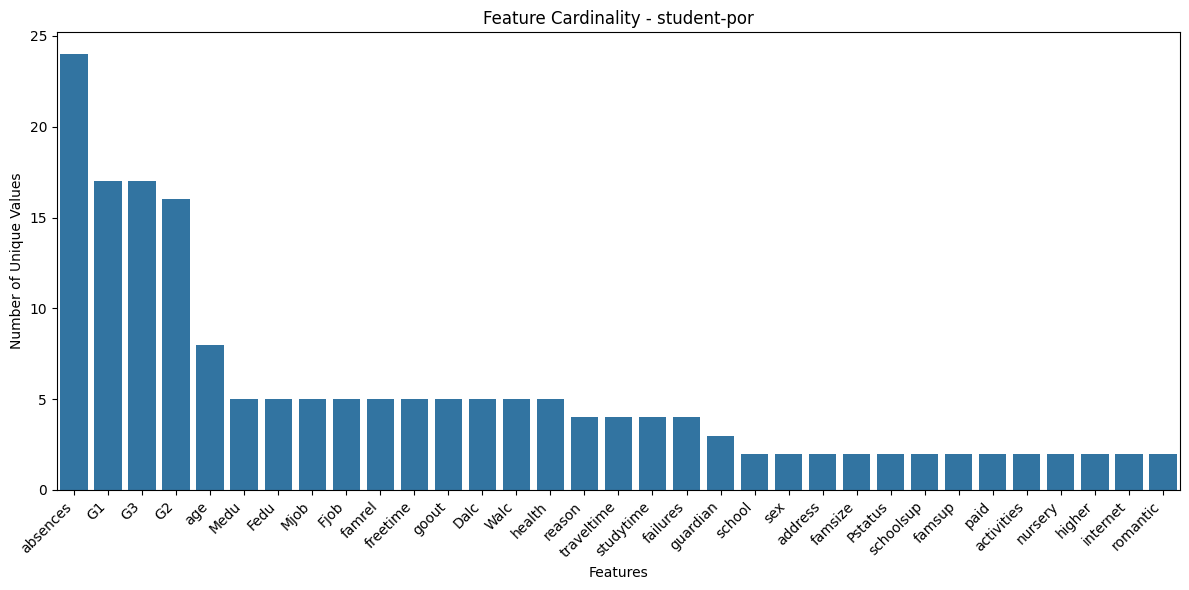

In [34]:
# Select only numeric columns
numeric_cols_mat = student_mat.select_dtypes(include=['number'])
numeric_cols_por = student_por.select_dtypes(include=['number'])

# Define a function to analyze covariance and correlation
def analyze_covariance_and_correlation(df, dataset_name):
    print(f"Analyzing Covariance and Correlation for {dataset_name} Dataset")
    
    # Continuous features
    continuous_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Covariance matrix
    covariance_matrix = df[continuous_features].cov()
    print(f"Covariance Matrix for {dataset_name}:\n", covariance_matrix)

    # Correlation matrix
    correlation_matrix = df[continuous_features].corr()
    print(f"Correlation Matrix for {dataset_name}:\n", correlation_matrix)
    
    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap - {dataset_name}")
    plt.show()

# Perform covariance and correlation analysis for both datasets
analyze_covariance_and_correlation(student_mat, "student-mat")
analyze_covariance_and_correlation(student_por, "student-por")

# Advanced Tabular Overview
def advanced_tabular_overview(df):
    # Summary of numerical columns
    numerical_summary = df.describe().transpose()
    numerical_summary['missing_values'] = df.isnull().sum()
    numerical_summary['unique_values'] = df.nunique()
    
    # Summary of categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_summary = pd.DataFrame({
        "unique_values": [df[col].nunique() for col in categorical_cols],
        "missing_values": [df[col].isnull().sum() for col in categorical_cols],
        "most_frequent_value": [df[col].mode()[0] if not df[col].mode().empty else None for col in categorical_cols],
    }, index=categorical_cols)
    
    print("\nNumerical Summary:")
    display(numerical_summary)
    print("\nCategorical Summary:")
    display(categorical_summary)

print("Advanced Overview for student-mat Dataset:")
advanced_tabular_overview(student_mat)

print("Advanced Overview for student-por Dataset:")
advanced_tabular_overview(student_por)

# Target Variable Exploration - G3
def explore_target_variable(df, dataset_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['G3'], bins=15, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"G3 Distribution in {dataset_name}")
    plt.xlabel("G3 (Final Grade)")
    plt.ylabel("Frequency")
    plt.show()

print("Exploring G3 (Final Grade) in student-mat Dataset:")
explore_target_variable(student_mat, "student-mat")

print("Exploring G3 (Final Grade) in student-por Dataset:")
explore_target_variable(student_por, "student-por")

# Feature Importance Exploration Function
def feature_importance_exploration(df, target_col):
    # Prepare data
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Encode categorical features column-wise
    label_encoders = {}
    for col in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Store the encoder in case you need it later
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit decision tree
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Feature importance
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importance:")
    display(importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='Importance', y='Feature', color='b')
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

print("Feature Importance Exploration for student-mat Dataset:")
feature_importance_exploration(student_mat, 'G3')

print("Feature Importance Exploration for student-por Dataset:")
feature_importance_exploration(student_por, 'G3')

student_mat.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

student_por.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

X = student_mat.drop(columns=['G3'])
y = student_mat['G3']

# Identify overlapping categorical features
overlapping_categorical_features = list(
    set(student_mat.select_dtypes(include='object').columns) &
    set(student_por.select_dtypes(include='object').columns)
)

# Create bar plots for overlapping categorical features
num_cols = 3  # Number of columns in the plot grid
num_rows = -(-len(overlapping_categorical_features) // num_cols)  # Calculate rows needed

plt.figure(figsize=(5 * num_cols, 4 * num_rows))  # Adjust figure size for grid

for i, feature in enumerate(overlapping_categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    combined_data = pd.concat([
        student_mat[[feature, 'G3']].assign(Dataset='Math'),
        student_por[[feature, 'G3']].assign(Dataset='Portuguese')
    ])
    sns.barplot(
        data=combined_data,
        x=feature,
        y='G3',
        hue='Dataset',
        errorbar=None,  # Updated to handle Seaborn's future versions
        palette="viridis"
    )
    plt.title(f"G3 by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average G3")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Define a function to analyze feature cardinality
def analyze_cardinality(df, dataset_name):
    print(f"\nAnalyzing Cardinality for {dataset_name} Dataset")
    
    # Calculate cardinality for all features
    cardinality = {col: df[col].nunique() for col in df.columns}
    
    # Display cardinality in a sorted order
    sorted_cardinality = sorted(cardinality.items(), key=lambda x: x[1], reverse=True)
    for feature, unique_values in sorted_cardinality:
        print(f"Feature: {feature}, Unique Values: {unique_values}")
    
    # Visualize cardinality
    plt.figure(figsize=(12, 6))
    sns.barplot(x=[item[0] for item in sorted_cardinality], y=[item[1] for item in sorted_cardinality])
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Feature Cardinality - {dataset_name}")
    plt.xlabel("Features")
    plt.ylabel("Number of Unique Values")
    plt.tight_layout()
    plt.show()

# Analyze cardinality for both datasets
analyze_cardinality(student_mat, "student-mat")
analyze_cardinality(student_por, "student-por")

### Continuous Features

#### Age
- Range: 15-22 years
- Mean (Math): 16.70 years
- Mean (Portuguese): 16.74 years
- Consistent across both datasets, typical high school age range

#### Parent Education (Medu & Fedu)
- Scale: 0-4 (likely representing education levels)
- Mean Mother's Education (Math): 2.75
- Mean Father's Education (Math): 2.52
- Mean Mother's Education (Portuguese): 2.51
- Mean Father's Education (Portuguese): 2.31
- Slight variations between datasets
- Moderate level of parental education observed

#### Study-Related Continuous Features
1. **Travel Time**
   - Scale: 1-4
   - Mean (Math): 1.45
   - Mean (Portuguese): 1.57
   - Suggests most students have relatively short travel times

2. **Study Time**
   - Scale: 1-4
   - Mean (Math): 2.04
   - Mean (Portuguese): 1.93
   - Indicates moderate study time dedication

3. **Academic Failures**
   - Range: 0-3
   - Mean (Math): 0.33
   - Mean (Portuguese): 0.22
   - Low average of academic failures

#### Social and Behavioral Features
1. **Family Relationship** (famrel)
   - Scale: 1-5
   - Mean (both datasets): ~3.94
   - Suggests generally positive family relationships

2. **Free Time** (freetime)
   - Scale: 1-5
   - Mean (Math): 3.24
   - Mean (Portuguese): 3.18
   - Moderate amount of free time

3. **Going Out** (goout)
   - Scale: 1-5
   - Mean (both datasets): ~3.10
   - Moderate social activity level

4. **Alcohol Consumption**
   - Daily Alcohol (Dalc): Mean ~1.48-1.50
   - Weekend Alcohol (Walc): Mean ~2.29-2.28
   - Low daily, moderate weekend alcohol consumption

#### Health and Absences
1. **Health Status**
   - Scale: 1-5
   - Mean (Math): 3.55
   - Mean (Portuguese): 3.54
   - Indicates generally good health

2. **Absences**
   - Math dataset: Mean 5.71, Max 75
   - Portuguese dataset: Mean 3.66, Max 32
   - Significant variation in student attendance

### Categorical Features

#### School and Demographics
1. **School**
   - Two types (likely different schools or tracks)
   - Most common: GP (Gabriel Pereira)

2. **Sex**
   - Binary (Male/Female)
   - Most common: Female

3. **Address**
   - Two types (Urban/Rural)
   - Most common: Urban (U)

4. **Family Size**
   - Two categories
   - Most common: GT3 (>3 family members)

5. **Parent Status**
   - Two categories
   - Most common: Together (T)

#### Parental and Educational Factors
1. **Parent Jobs** (Mjob & Fjob)
   - Five job categories
   - Most common category: "other" for both mothers and fathers

2. **Reason for School Choice**
   - Four categories
   - Most common: Course selection

3. **Guardian**
   - Three categories
   - Most common: Mother

#### Support and Activities
1. **School Support**
   - Most students: No additional school support

2. **Family Support**
   - Most students: Have family support (yes)

3. **Paid Classes**
   - Most students: No paid classes

4. **Extra-Curricular Activities**
   - Slightly varies between datasets
   - Mostly balanced participation

5. **Higher Education Intention**
   - Most students: Interested in higher education

6. **Internet Access**
   - Most students: Have internet access

7. **Romantic Relationship**
   - Most students: Not in a romantic relationship

### Key Generalizations
1. Typical high school students with moderate family support
2. Generally positive health and family relationships
3. Moderate study time and social activities
4. Low daily, moderate weekend alcohol consumption
5. Urban students with intention for higher education
6. Previous grades are the strongest predictor of final grades
7. Absences significantly impact academic performance

### Identifying Data Quality Issues

- There are no missing values, very few outliers, and cardinality isn't an issue for the most part

## Experimental Design & Data Preprocessing

### Merging the files

In [35]:
# Merge the normalized datasets
student_dataset = pd.concat([student_mat, student_por], ignore_index=True)

# Save the merged dataset to a CSV file
student_dataset.to_csv('Data/student_dataset.csv', index=False)

### Categorical to Numeric + Normalization

In [36]:
# Load the original dataset (So that categorical columns may be read as 'object')
student_dataset = pd.read_csv("Data/student_dataset.csv")

# Identify categorical and numerical columns
categorical_columns = student_dataset.select_dtypes(include=["object"]).columns
numerical_columns = student_dataset.select_dtypes(include=["float64", "int64"]).columns

# Binary Encoding for High-Cardinality Features
high_cardinality_columns = ['Mjob', 'Fjob']
binary_encoder = BinaryEncoder()

for col in high_cardinality_columns:
    if col in categorical_columns:  # Check if the column is categorical
        # Encode high-cardinality categorical columns
        encoded_columns = binary_encoder.fit_transform(student_dataset[[col]])
        encoded_columns.columns = [f"{col}_binary_{i}" for i in range(encoded_columns.shape[1])]
        # Replace the original column with encoded columns
        student_dataset = pd.concat([student_dataset.drop(columns=[col]), encoded_columns], axis=1)

# One-Hot Encoding for Low-Cardinality Features
low_cardinality_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus']
student_dataset = pd.get_dummies(student_dataset, columns=low_cardinality_columns, drop_first=True)

# Update numerical columns after encoding
numerical_columns = student_dataset.select_dtypes(include=["float64", "int64"]).columns

# Normalize Numerical Columns
scaler = MinMaxScaler()
student_dataset[numerical_columns] = scaler.fit_transform(student_dataset[numerical_columns])

# Save the encoded and normalized dataset
student_dataset.to_csv("Normalized/normalized_encoded_student_dataset.csv", index=False)

### Exploratory Data Analysis

#### Summary Stattistics + Visualization

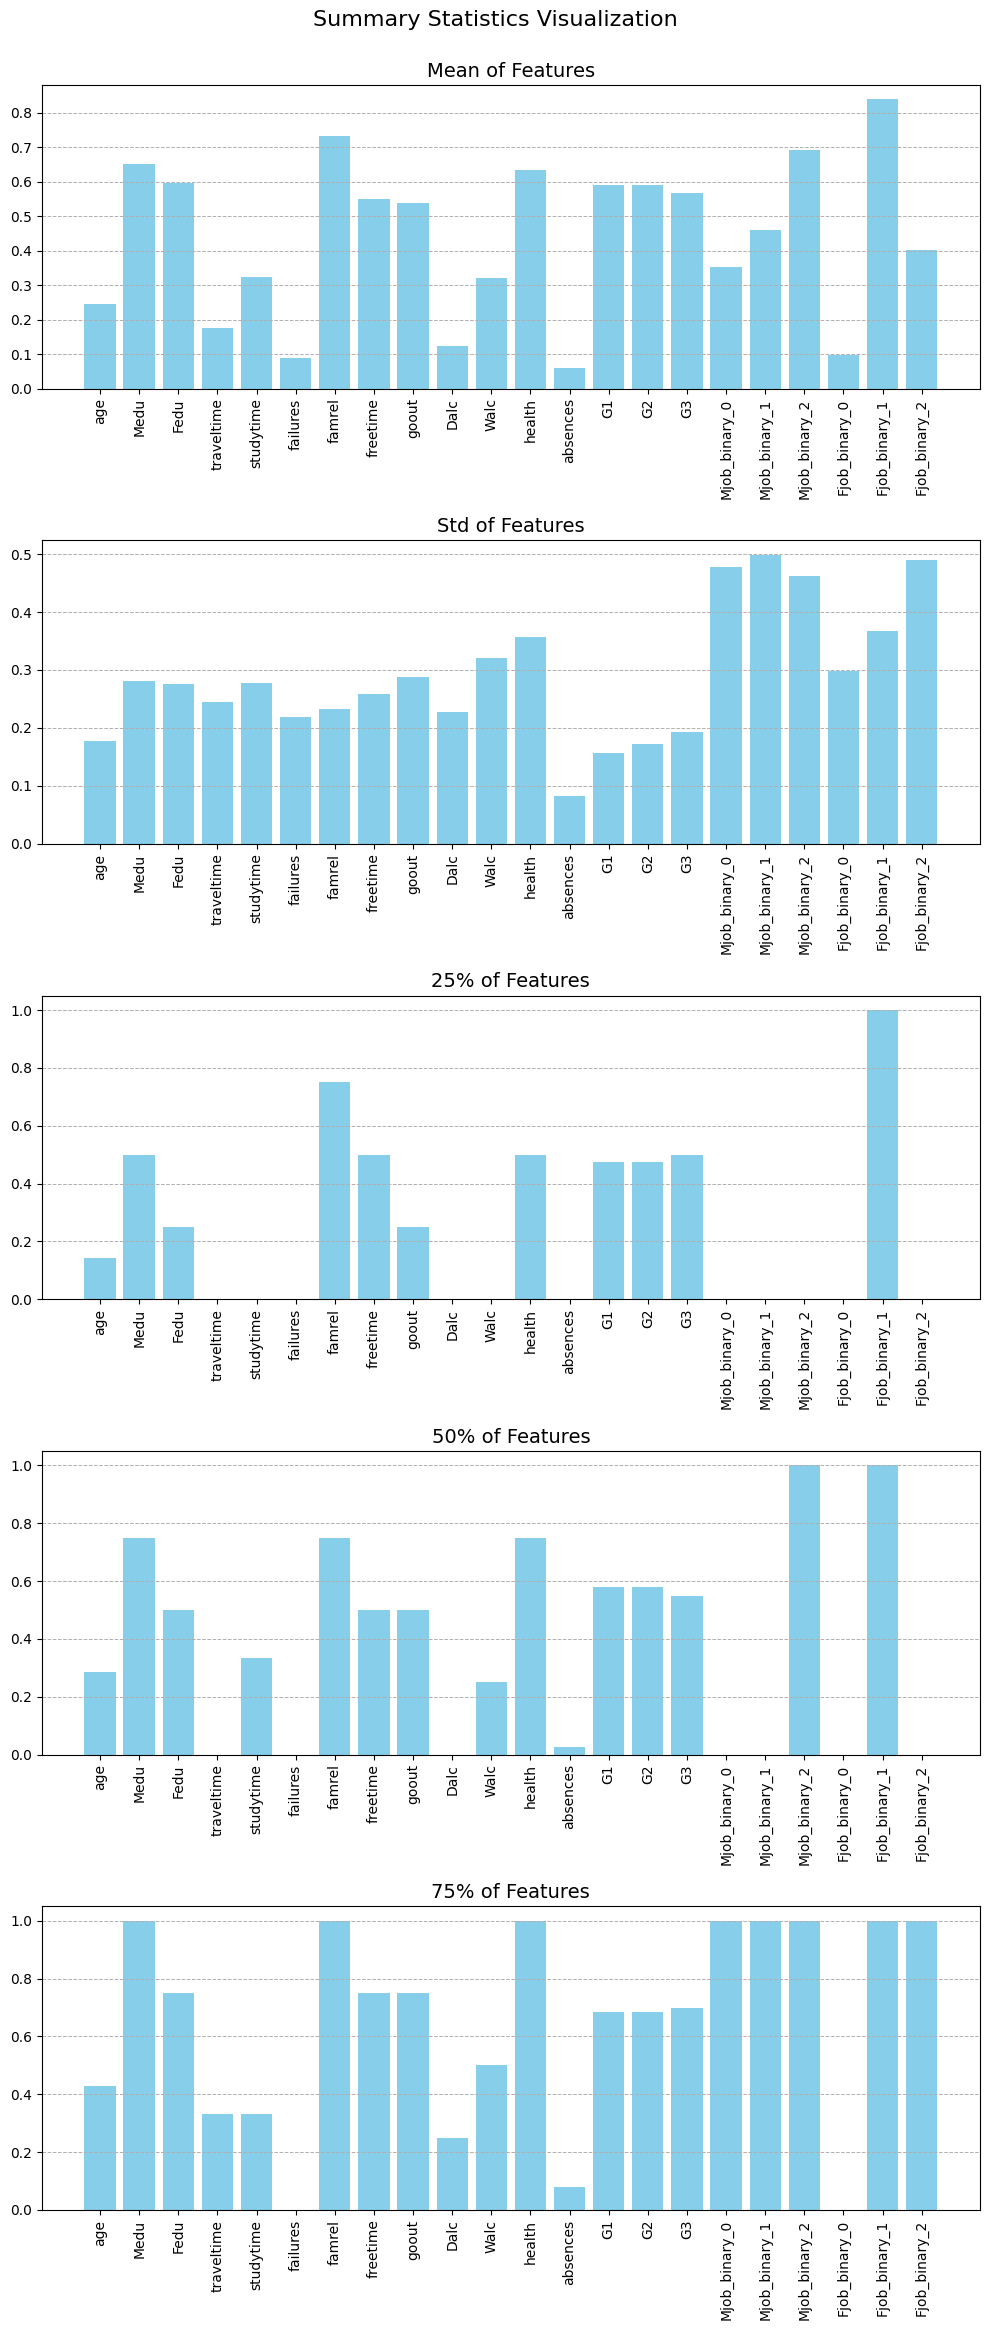

In [38]:
# Load the normalized and encoded dataset
file_path = "Normalized/normalized_encoded_student_dataset.csv"
student_dataset = pd.read_csv(file_path)

# Generate summary statistics for all numerical columns
summary_stats = student_dataset.describe()

# Save the summary statistics to a CSV file for easier reference
summary_stats.to_csv("summary_statistics.csv", index=True)

stats_to_plot = summary_stats.loc[["mean", "std", "25%", "50%", "75%"]]

# Visualize summary statistics
fig, axes = plt.subplots(len(stats_to_plot.index), 1, figsize=(10, 25), tight_layout=True)

for i, stat in enumerate(stats_to_plot.index):
    axes[i].bar(stats_to_plot.columns, stats_to_plot.loc[stat], color='skyblue')
    axes[i].set_title(f'{stat.capitalize()} of Features', fontsize=14)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(axis='y', linestyle='--', linewidth=0.7)

# Add a main title
plt.suptitle('Summary Statistics Visualization', fontsize=16, y=0.93)

# Adjust spacing to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.5)

plt.savefig("filtered_summary_statistics_visualization_fixed.png")
plt.show()

### Feature Engineering

Encoding non-numeric columns: Index(['reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


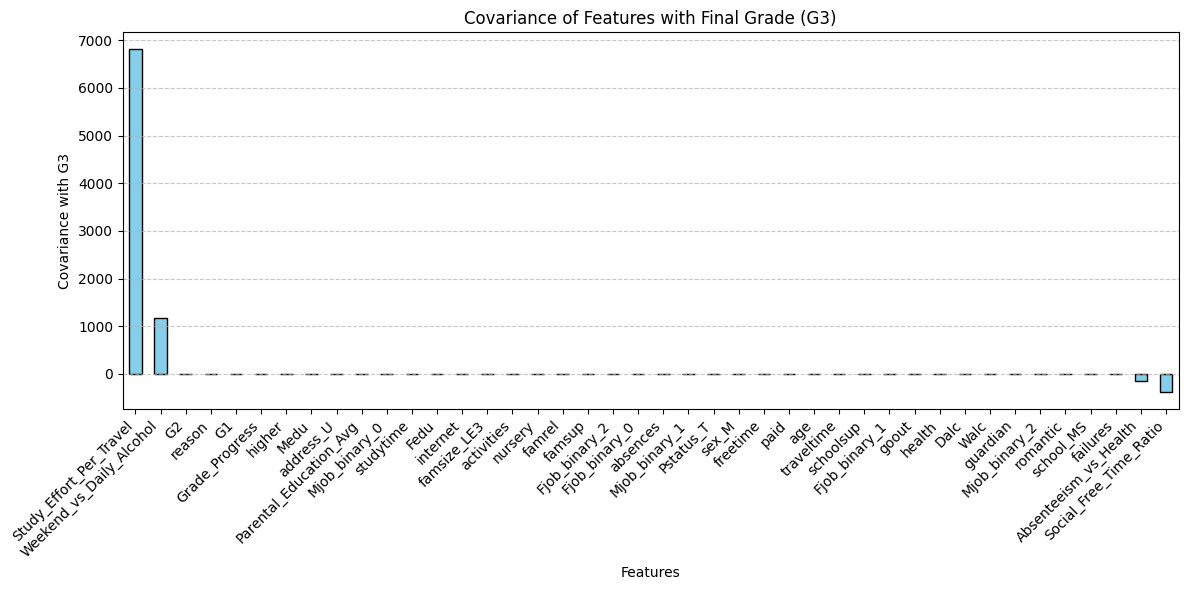

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
student_dataset = pd.read_csv("Normalized/normalized_encoded_student_dataset.csv")

# Step 1: Convert all categorical columns to numeric
# Identify non-numeric columns
non_numeric_columns = student_dataset.select_dtypes(include=["object"]).columns

# Encode non-numeric columns
if len(non_numeric_columns) > 0:
    print(f"Encoding non-numeric columns: {non_numeric_columns}")
    label_encoder = LabelEncoder()
    for col in non_numeric_columns:
        student_dataset[col] = label_encoder.fit_transform(student_dataset[col])

# Step 2: Add new features
# 1. Parental Education Average
student_dataset['Parental_Education_Avg'] = (student_dataset['Medu'] + student_dataset['Fedu']) / 2

# 2. Study Effort vs. Travel Time
# Avoid division by zero by replacing 0 in 'traveltime' with a small value
student_dataset['traveltime'] = student_dataset['traveltime'].replace(0, 1e-6)
student_dataset['Study_Effort_Per_Travel'] = student_dataset['studytime'] / student_dataset['traveltime']

# 3. Social & Free Time Ratio
# Avoid division by zero by replacing 0 in 'freetime' with a small value
student_dataset['freetime'] = student_dataset['freetime'].replace(0, 1e-6)
student_dataset['Social_Free_Time_Ratio'] = student_dataset['goout'] / student_dataset['freetime']

# 4. Weekend to Daily Alcohol Ratio
# Avoid division by zero by replacing 0 in 'Dalc' with a small value
student_dataset['Dalc'] = student_dataset['Dalc'].replace(0, 1e-6)
student_dataset['Weekend_vs_Daily_Alcohol'] = student_dataset['Walc'] / student_dataset['Dalc']

# 5. Absenteeism Impact
# Avoid division by zero by replacing 0 in 'health' with a small value
student_dataset['health'] = student_dataset['health'].replace(0, 1e-6)
student_dataset['Absenteeism_vs_Health'] = student_dataset['absences'] / student_dataset['health']

# 6. Final Grade Progress
student_dataset['Grade_Progress'] = (student_dataset['G2'] - student_dataset['G1']) + (student_dataset['G3'] - student_dataset['G2'])

# Save the updated dataset
student_dataset.to_csv("Normalized/normalized_encoded_student_dataset_with_features.csv", index=False)

# Step 3: Compute the covariance matrix
# Ensure all columns are numeric
covariance_matrix = student_dataset.cov()

# Calculate the covariance of each feature with the target variable G3
target_covariance = covariance_matrix['G3'].drop('G3')  # Drop G3 itself to avoid self-covariance

# Sort covariance values in descending order
sorted_covariance = target_covariance.sort_values(ascending=False)

# Step 4: Plot the covariance as a bar plot
plt.figure(figsize=(12, 6))
sorted_covariance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Covariance of Features with Final Grade (G3)")
plt.xlabel("Features")
plt.ylabel("Covariance with G3")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as a file (optional)
plt.savefig("covariance_with_G3_barplot.png", dpi=300)

# Display the plot
plt.show()